In [ ]:
# Revisiting the Breakthrough Research papers in Generative AI in Computer Vision

# **Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks by Jun-Yan Zhu & co-authors, UC Berkeley**

---> This paper presents an innovative approach to address the problem of unpaired image-to-image translation. This paper introduces a novel framework for learning mappings between two domains of images without requiring explicit paired training data, a limitation that was present in earlier methods.

************************************
#**Introduction**

An unsupervised learning approach has been used to address the lack of paired training data in case of Image to Image translation. Obtaining huge amount of such paired image data can be challenging and expensive, limiting the applicability of other supervised methods.

While using this unsupervised approach with two different image dataset without any pairing, It is assumed that there exists an underlying relationship between the two image domains. For example, both domains may represent different renderings of the same underlying scene.

Thus, objective has been defined to learn mapping function between Image domain A to image domain B by introducing cyclic consistency which means that if an image is translated from A to B and then back from B to A, it should return to the original image. .

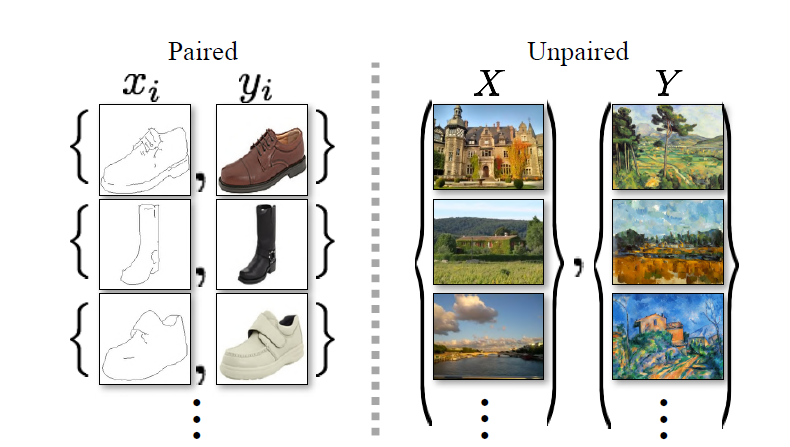

----->     Image from original paper.  Paired data (left)   & unpaired data (right)

******************************
# The Setup

The model contains two mapping functions **G : X -> Y** and **F : Y -> X**, and associated adversarial *discriminators* **Dy** and **Dx**. **Dy** encourages **G** to translate **X** into outputs indistinguishable from domain **Y** , and vice versa for **Dx** and **F**.

To further regularize the mappings, two cycle consistency losses are introduced that capture the intuition that if translated from one domain to the other and back again it should arrive at where it started.

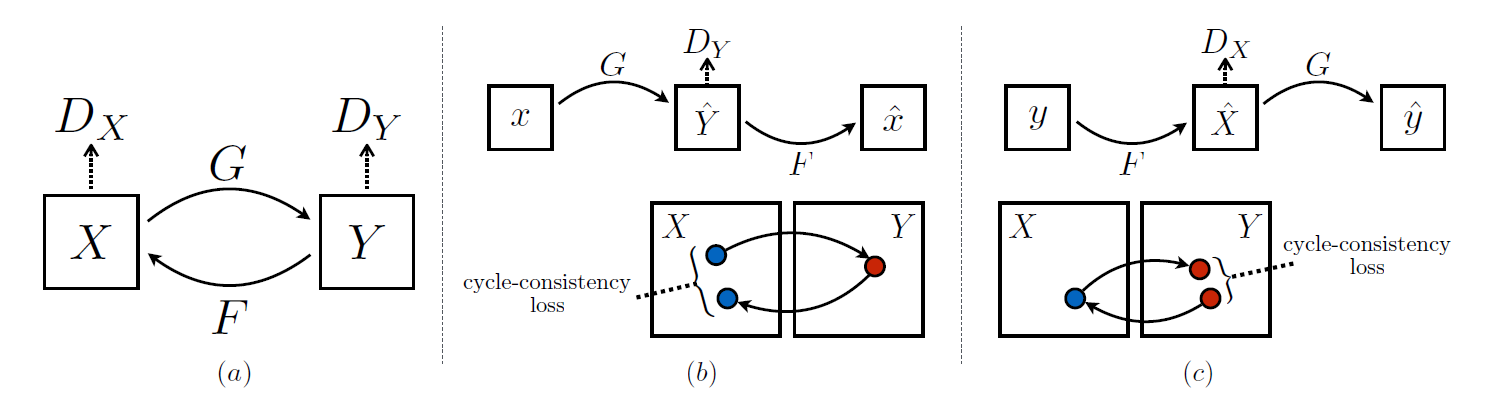

------>   (Image from original paper.) Block diagram of cycleGAN model

**Forward** cycle-consistency loss: **x -> G(x) -> F(G(x)) ~ x**

***Backward*** cycle-consistency loss: **y -> F(y) -> G(F(y)) ~ y**

This way model will learn the mapping between two image collections, rather than between two specific images, by trying to capture correspondences
between higher-level appearance structures.

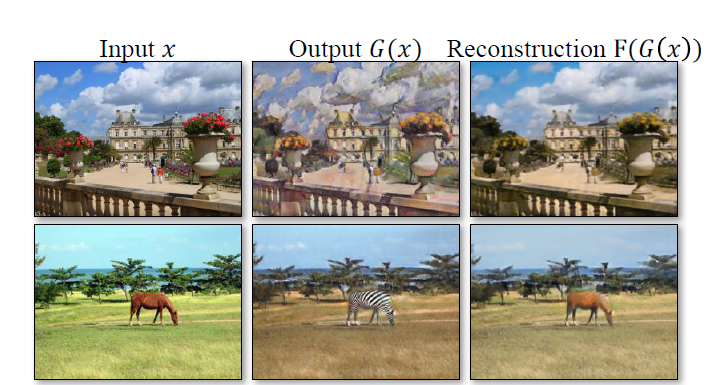

------>    (Image from original paper.)  Image reconstruction from other domain

-------------------------------------

# Objective:
The objective function contains two types of terms:
* **Adversarial losses** : For matching the distribution of generated images to the data distribution in the target domain. For example, for forward mapping,  **G** tries to generate images **G(x)** that look similar to images from domain **Y** , while **Dy** aims to distinguish between translated samples **G(x)** and real samples **y. G** aims to minimize this objective against an adversary **D** that tries to maximize it, i.e., **min{G}** **max{Dy}** **Loss_gan(G ,Dy ,X ,Y)**.

  Similarily, Another loss function are made for backward mapping.


* **Cycle consistency losses**: To prevent the learned mappings **G** and **F** from contradicting each other. Since, adversarial losses alone cannot guarantee
that the learned function can map an individual input x_i to a desired output y_i.

  **Reason**: A network can map the same set of input images to any random permutation of images in the target domain, where any of the learned mappings can induce an output distribution that matches the target distribution.

  To further reduce the space of possible mapping functions, the learned mapping functions should be cycle-consistent.

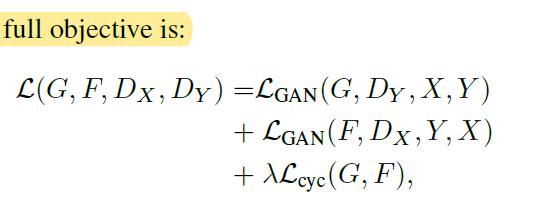

------> (Image from original paper)

  Thus, loss function needs to included which is induced by the cycle consistency loss where the reconstructed images F(G(x)) end up matching closely to the input images x but not 100%.


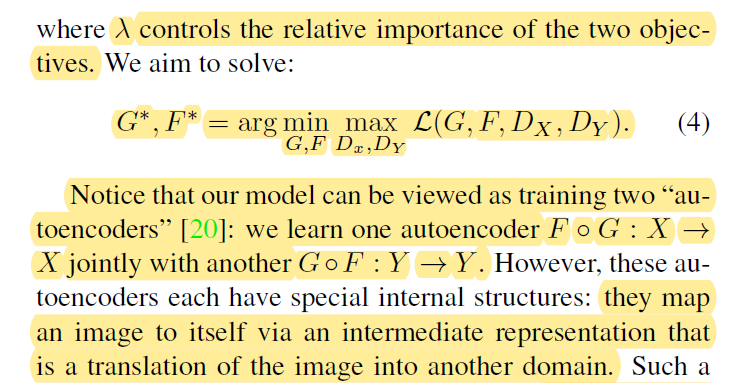

------->  ( image from original paper)
______________________________________________

# Building architecture components:

The network architecture for CycleGAN consists of Generator and Discriminator in Adversarial Autoencoder format.

* The **Generator**: It will contain three elements, Encoding layer, Transformation layer and Decoding layer.

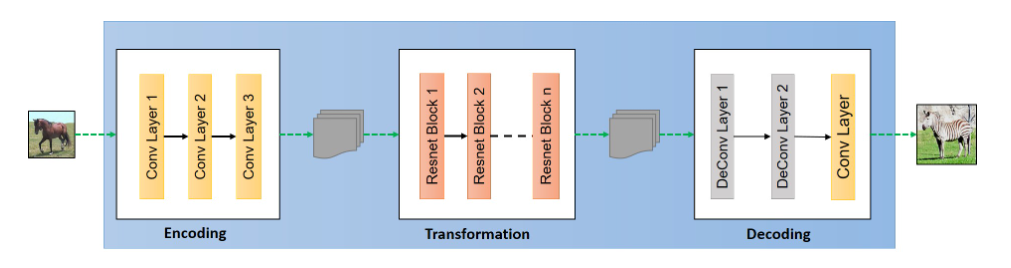
----------> (Image from github)

* The **Discriminator** : It will be a Classification network to detect whether generated image is from selected domain or not.



------------------------------------
# Conclusions & future possibilities:
  **CycleGAN** has had a significant impact on the field of computer vision and image processing. It has opened up new possibilities for creating artistic and stylized images, domain adaptation, and data augmentation without the need for paired training data. The idea of cycle-consistency has been widely adopted in subsequent research.

  Limitations:
  * It points out that the method is particularly successful in tasks that involve color and texture changes. While this method does not perform well, especially in tasks requiring geometric changes.

The content suggests that integrating weak or semi-supervised data into the training process could lead to more powerful translation models.

There has already been many progress in enhancing Image translation and style transfer models.

Code implementation of cycleGAN network can be found here:  https://github.com/joshir199/CycleGAN-An-Unsupervised-Image-translation-approach-Implementation